# Loan Prediction

In [1]:
#  this notebook for customer for customer segmentation 
# here all code is belong to Zafer Acar and if used another code from another person is stated

In [2]:
#import libraries

In [3]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

import re

In [4]:
#upload data

In [5]:
df=pd.read_csv("LoansTrainingSet.csv")

In [6]:
#EDA explatory data analysis

In [7]:
# see first 5 cells

In [8]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [9]:
#see data shape

In [10]:
df.shape

(256984, 19)

In [11]:
#see information from data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [13]:
# see statisticcs about data

In [14]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,256984.0,13713306.26,34381306.57,505.0,8299.0,14298.0,24367.0,99999999.0
Credit Score,195308.0,1251.12,1762.02,585.0,714.0,733.0,744.0,7510.0
Annual Income,195308.0,71952.72,58877.57,0.0,44321.0,61242.0,86462.0,8713547.0
Years of Credit History,256984.0,18.29,7.08,3.4,13.5,17.0,21.7,70.5
Months since last delinquent,116601.0,34.88,21.85,0.0,16.0,32.0,51.0,176.0
Number of Open Accounts,256984.0,11.11,4.98,0.0,8.0,10.0,14.0,76.0
Number of Credit Problems,256984.0,0.16,0.46,0.0,0.0,0.0,0.0,11.0
Current Credit Balance,256984.0,15406.56,19665.06,0.0,5974.0,11078.0,19319.0,1731412.0
Bankruptcies,256455.0,0.11,0.34,0.0,0.0,0.0,0.0,7.0
Tax Liens,256961.0,0.03,0.25,0.0,0.0,0.0,0.0,11.0


In [15]:
# see the corelaitons belong to data

In [16]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [17]:
# see datas columns names

In [18]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [19]:
# is data have missing values? see

In [20]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [21]:
# Handdle missing values

In [22]:
#fill all cell with their mean unless Years in current job

In [23]:
df['Credit Score']=df['Credit Score'].fillna(df['Credit Score'].mean()) 
#df['Years in current job']=df['Years in current job'].fillna(df['Years in current job'].mean()) 
df['Annual Income']=df['Annual Income'].fillna(df['Annual Income'].mean()) 
df['Months since last delinquent']=df['Months since last delinquent'].fillna(df['Months since last delinquent'].mean()) 
df['Bankruptcies']=df['Bankruptcies'].fillna(df['Bankruptcies'].mean()) 
df['Tax Liens']=df['Tax Liens'].fillna(df['Tax Liens'].mean()) 

In [24]:
#calcularte Years in current job mode

In [25]:
df["Years in current job"].mode()

0    10+ years
Name: Years in current job, dtype: object

In [26]:
#fill Years in current job with mode

In [27]:
df['Years in current job']=df['Years in current job'].fillna("10+ years")

In [28]:
#check missing values is fill

In [29]:
df.isnull().sum().sum()#second sum belong to Selman İmdat

0

In [30]:
#we will drop dupliacate cells

In [31]:
df = df.drop_duplicates()#belong to Selman İmdat

In [32]:
#see how many cells stayed

In [33]:
df.shape

(240374, 19)

In [34]:
# feature engineering

In [35]:
# see first 5 cells

In [36]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.00000,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,34.88145,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,34.88145,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,34.88145,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,34.88145,12,0,17391,37081,0.0,0.0


In [37]:
# look at the purpsoe cells unique values maybe it has spelling differences 

In [38]:
df["Purpose"].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [39]:
#other and Other is same we will to connect each other

In [40]:
df['Purpose'] = df['Purpose'].replace('Other', 'other')

In [41]:
#chek it 

In [42]:
df["Purpose"].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Buy a Car', 'Medical Bills',
       'Take a Trip', 'Educational Expenses'], dtype=object)

In [43]:
#Lets check other object cells

In [44]:
#for Loan Status

In [45]:
df["Loan Status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [46]:
#for Term

In [47]:
df["Term"].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [48]:
#for Home Ownership

In [49]:
df["Home Ownership"].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [50]:
#for Years in current job

In [51]:
df["Years in current job"].unique()

array(['10+ years', '4 years', '6 years', '5 years', '3 years', '2 years',
       '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [52]:
# in Home Ownership colons Home Mortgage and HaveMortgage is same we will to connect each other

In [53]:
df['Home Ownership'] = df['Home Ownership'].replace('HaveMortgage', 'Home Mortgage')

In [54]:
#chek it

In [55]:
df["Home Ownership"].unique()

array(['Home Mortgage', 'Own Home', 'Rent'], dtype=object)

In [56]:
# credit score is float bu it is wrong let turn into integer

In [57]:
df["Credit Score"]=df["Credit Score"].astype("int32")#Selman İmdat

In [58]:
#lets chek

In [59]:
df["Credit Score"].info()

<class 'pandas.core.series.Series'>
Int64Index: 240374 entries, 0 to 256983
Series name: Credit Score
Non-Null Count   Dtype
--------------   -----
240374 non-null  int32
dtypes: int32(1)
memory usage: 2.8 MB


In [60]:
# turn Monthly Debt into float beacause we can't do machine learnng with this status

In [61]:
# we replace all "," to "." 

In [62]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace(',',".")

In [63]:
#we take numeric part

In [64]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace('$',"").str.replace('.',"")

In [65]:
#and turn into float

In [66]:
df['Monthly Debt'] = df['Monthly Debt'].astype("int32")

In [67]:
#chek 

In [68]:
df['Monthly Debt'].info()

<class 'pandas.core.series.Series'>
Int64Index: 240374 entries, 0 to 256983
Series name: Monthly Debt
Non-Null Count   Dtype
--------------   -----
240374 non-null  int32
dtypes: int32(1)
memory usage: 2.8 MB


In [69]:
#see 5 cell for chek

In [70]:
df[['Monthly Debt']].head()

,Monthly Debt
0,58403
1,110604
2,132185
3,75192
4,35518


In [71]:
# Months since last delinquent turn to integer mounth count cant be float 

In [72]:
df["Months since last delinquent"]=df["Months since last delinquent"].astype("int32")

In [73]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741,10+ years,Home Mortgage,33694.0,Debt Consolidation,58403,12.3,41,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734,4 years,Home Mortgage,42269.0,other,110604,26.3,34,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747,10+ years,Home Mortgage,90126.0,Debt Consolidation,132185,28.8,34,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747,10+ years,Own Home,38072.0,Debt Consolidation,75192,26.2,34,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746,4 years,Rent,50025.0,Debt Consolidation,35518,11.5,34,12,0,17391,37081,0.0,0.0


In [74]:
# Maximum Open Credit turn to integer from object 

In [75]:
#replace broken valus into none

In [76]:
df['Maximum Open Credit']=df['Maximum Open Credit'].replace('#VALUE!',)

In [77]:
# turn to integer

In [78]:
df['Maximum Open Credit']=df['Maximum Open Credit'].astype("int32")

## Models

In [79]:
#libraries

In [80]:
from pycaret.classification import*

In [81]:
setup(df,target="Loan Status",session_id=123)

,Description,Value
0,Session id,123
1,Target,Loan Status
2,Target type,Binary
3,Target mapping,"Charged Off: 0, Fully Paid: 1"
4,Original data shape,"(240374, 19)"
5,Transformed data shape,"(240374, 39)"
6,Transformed train set shape,"(168261, 39)"
7,Transformed test set shape,"(72113, 39)"
8,Ordinal features,1
9,Numeric features,12


In [82]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8631,0.8355,1.0000,0.8426,0.9146,0.5820,0.6407,4.2680
dt,Decision Tree Classifier,0.8619,0.7413,1.0000,0.8414,0.9139,0.5776,0.6373,2.2380
ridge,Ridge Classifier,0.8619,0.0000,1.0000,0.8414,0.9139,0.5776,0.6373,2.2820
rf,Random Forest Classifier,0.8619,0.7943,1.0000,0.8414,0.9139,0.5776,0.6373,5.0440
ada,Ada Boost Classifier,0.8619,0.7413,1.0000,0.8414,0.9139,0.5776,0.6373,2.2650
gbc,Gradient Boosting Classifier,0.8619,0.7413,1.0000,0.8414,0.9139,0.5776,0.6373,12.3340
lda,Linear Discriminant Analysis,0.8619,0.7413,1.0000,0.8414,0.9139,0.5776,0.6373,2.9830
lightgbm,Light Gradient Boosting Machine,0.8619,0.7413,1.0000,0.8414,0.9139,0.5776,0.6373,2.7730
catboost,CatBoost Classifier,0.8619,0.7627,1.0000,0.8414,0.9139,0.5776,0.6373,18.7560
lr,Logistic Regression,0.7906,0.7283,0.9943,0.7803,0.8744,0.2968,0.4028,4.8460


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [83]:
best_model=create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8641,0.8188,1.0000,0.8436,0.9152,0.5860,0.6437
1,0.8630,0.8408,1.0000,0.8425,0.9145,0.5818,0.6405
2,0.8622,0.8450,1.0000,0.8417,0.9141,0.5787,0.6381
3,0.8622,0.8276,1.0000,0.8418,0.9141,0.5790,0.6384
4,0.8638,0.8492,1.0000,0.8433,0.9150,0.5849,0.6429
5,0.8651,0.8546,1.0000,0.8446,0.9157,0.5894,0.6464
6,0.8625,0.8266,1.0000,0.8420,0.9142,0.5799,0.6390
7,0.8631,0.8342,1.0000,0.8426,0.9146,0.5823,0.6409
8,0.8632,0.8360,1.0000,0.8427,0.9146,0.5825,0.6410


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

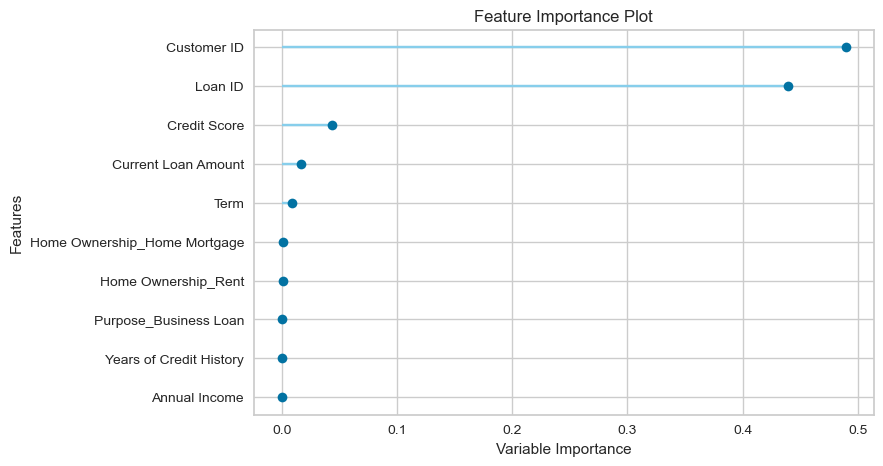

In [84]:
plot_model(best_model,plot="feature")